In [112]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
BINS = 150
def random_harmonic_distribution(N=400, times=400000, bins=BINS,plot = True):
    arr = np.arange(1, N + 1)
    xlist = np.sum(np.random.choice([-1, 1], size=(times, N)) / arr, axis=1)
    if plot:
        plt.hist(xlist, bins=bins, density=True, alpha=0.75, color='b', edgecolor='black')
        plt.xlabel("Sum of Random Harmonic Series")
        plt.ylabel("Frequency")
        plt.title(f"Histogram of Random Harmonic Series (Terms={N}, Samples={times})")
        plt.show()
    return xlist
val = random_harmonic_distribution(400,1000000,plot = False)
val2 = random_harmonic_distribution(20,1000000,plot = False)

KstestResult(statistic=0.004357999999999994, pvalue=1.1260172599638365e-08, statistic_location=-2.0432444814061, statistic_sign=1)


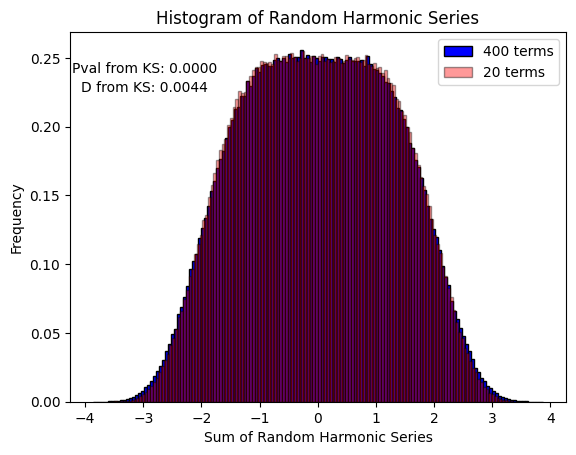

In [170]:
kstest = stats.ks_2samp(val,val2)
print(kstest)
plt.hist(val, bins=BINS, density=True, alpha=1, color='b', edgecolor='black',label = "400 terms")
plt.hist(val2, bins=BINS, density=True, alpha=0.4, color='r', edgecolor='black',label = "20 terms")
plt.text(0.15, 0.9, f"Pval from KS: {kstest[1]:.4f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.15, 0.85, f"D from KS: {kstest[0]:.4f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.xlabel("Sum of Random Harmonic Series")
plt.ylabel("Frequency")
plt.title(f"Histogram of Random Harmonic Series")
plt.legend()
plt.show()

In [ ]:
plateauvals20 = []
plateauvals100 = []
for i in range(0,200): # setting it higher will take much longer
    val = random_harmonic_distribution(20,400000,plot = False)
    val100 = random_harmonic_distribution(100,400000,plot = False) # Setting N = 400 takes a while
    counts,bins = np.histogram(val, bins=BINS,density = True)
    bins = (bins[1:] + bins[:-1]) / 2
    bin2mask =  np.argmin(np.abs(bins))
    plateauvals20.append(counts[bin2mask])

    counts,bins = np.histogram(val100, bins=BINS,density = True)
    bins = (bins[1:] + bins[:-1]) / 2
    bin2mask =  np.argmin(np.abs(bins))
    plateauvals100.append(counts[bin2mask])


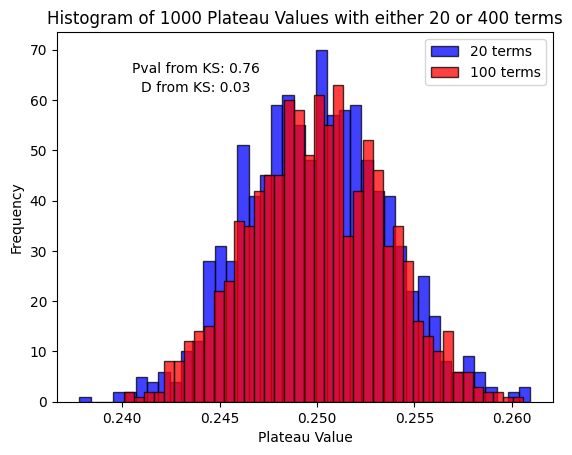

0.2499417077325416 0.00011583472328849576
0.2500047105319686 0.00011011564266465593
KstestResult(statistic=0.03, pvalue=0.7593695685682871, statistic_location=0.24714900960824673, statistic_sign=1)


In [167]:
kstest = stats.ks_2samp(plateauvals20,plateauvals100)
plt.hist(plateauvals20, bins=40, alpha=0.75, color='b', edgecolor='black',label = "20 terms")   
plt.hist(plateauvals100, bins=40, alpha=0.75, color='r', edgecolor='black',label = "100 terms")
plt.legend()
plt.title("Histogram of 1000 Plateau Values with either 20 or 400 terms")
plt.xlabel("Plateau Value")
plt.text(0.28, 0.9, f"Pval from KS: {kstest[1]:.2f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.text(0.28, 0.85, f"D from KS: {kstest[0]:.2f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.ylabel("Frequency")
plt.show()
print(np.mean(plateauvals20),np.std(plateauvals20)/np.sqrt(len(plateauvals20)))
print(np.mean(plateauvals100),np.std(plateauvals100)/np.sqrt(len(plateauvals100)))
print(kstest)